# Autocorrelation tempogram
Autocorrelation tempogram is based on autocorrelation. Autocorrelation measures the similarity between a signal and a time-shifted version of it.

In this approach, we need to compute short-time autocorrelation, which is autocorrelation applied to the novelty function locally. From that, we get a time-lag representation, which can be converted to time-tempo representation to obtain the most dominant tempo.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import librosa.display
from RhythmRecognition.constants import *
from RhythmRecognition.onset import energy
from RhythmRecognition.tempo import autocorrelation

audiofile = "../audio_files/spark.wav"


## Compute novelty function
Before computing the tempogram, we need to compute a novelty function of the audio signal. We will use the energy-based novelty function.

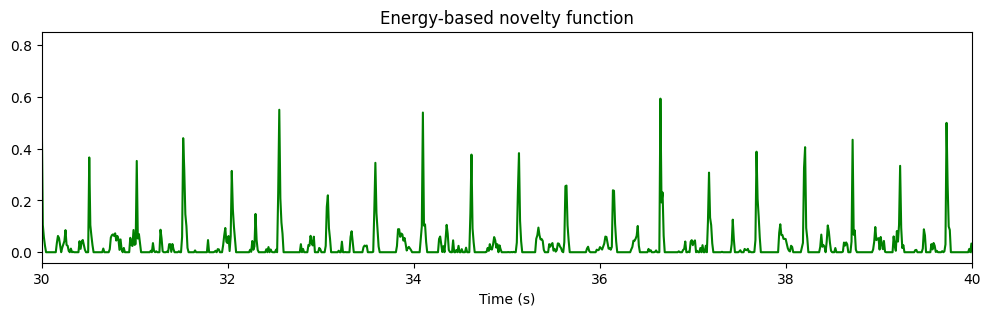

In [2]:
novelty_function = energy.EnergyNovelty(audiofile)
novelty_function = novelty_function.get()

frames = np.arange(len(novelty_function))
t = librosa.frames_to_time(frames, sr=SAMPLING_RATE, hop_length=HOP_LENGTH)

plt.figure(figsize=(12, 3))
plt.plot(t, novelty_function, 'green')
plt.xlim(30, 40)
plt.xlabel("Time (s)")
plt.title("Energy-based novelty function")
plt.show()

## Compute tempogram
After computing a novelty function, we can compute the autocrrelation tempogram.

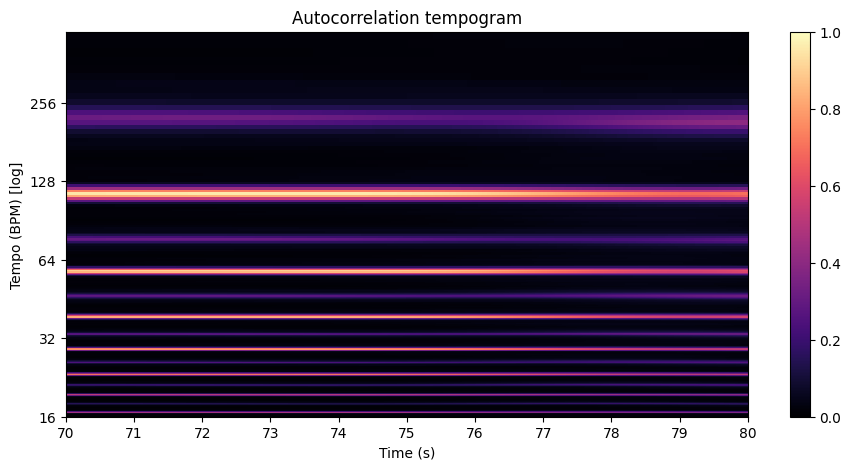

In [3]:

autocorrelation_tempogram = autocorrelation.AutocorrelationTempogram(novelty_function)
tempogram = autocorrelation_tempogram.get_tempogram()

plt.figure(figsize=(11, 5))
librosa.display.specshow(tempogram, x_axis='time', y_axis='tempo', sr=SAMPLING_RATE, cmap='magma')
plt.xlabel("Time (s)")
plt.ylabel("Tempo (BPM) [log]")
plt.xlim(70, 80)
plt.colorbar()
plt.title("Autocorrelation tempogram")
plt.show()

Then, we can extract the most dominant tempo from the tempogram (correct value is 117 BPM)

In [4]:
tempo = autocorrelation_tempogram.get_tempo()
print("Tempo:", tempo, "BPM")

Tempo: 115 BPM


For better visualization of dominant tempi, we can also sum up the Fourier tempogram for each BPM value and inspect this function. A higher value indicates a more dominant tempo.

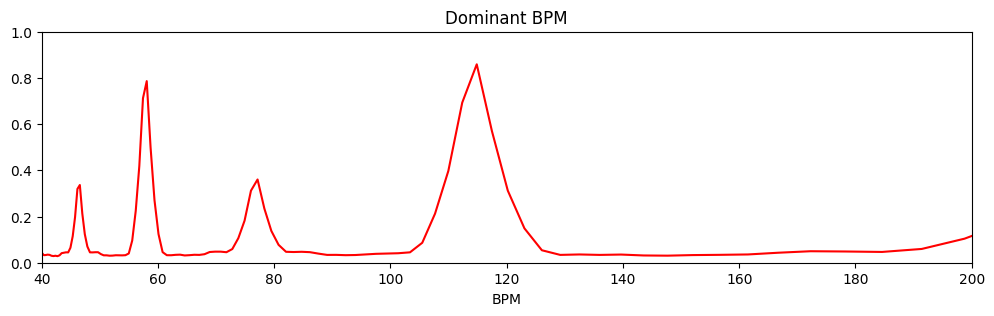

In [5]:
sum_of_tempos = np.sum(tempogram.T, axis=0)
sum_of_tempos /= max(sum_of_tempos)
bpm_values = 60 / t[1:]  # starting from index 1, so we don't divide by 0

plt.figure(figsize=(12, 3))
plt.plot(bpm_values[:len(sum_of_tempos)], sum_of_tempos, color="red")
plt.xlabel('BPM')
plt.xlim(40, 200)  # show only subset of tempi, because this is the interval where tempo is taken from
plt.ylim(0, 1)
plt.title("Dominant BPM")
plt.show()